<a href="https://colab.research.google.com/github/justynigam/DS-Task/blob/main/flight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flight Price prediction


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [3]:
data = pd.read_csv('flight.csv')

In [4]:
data.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


In [6]:
data.shape

(129369, 12)

In [5]:
data['flight'].nunique()

1206

In [8]:
#Droping the irrelevant columns
data.drop(['Unnamed: 0' , 'flight'] , axis=1 , inplace=True)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129369 entries, 0 to 129368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           129369 non-null  object 
 1   source_city       129369 non-null  object 
 2   departure_time    129369 non-null  object 
 3   stops             129369 non-null  object 
 4   arrival_time      129369 non-null  object 
 5   destination_city  129369 non-null  object 
 6   class             129368 non-null  object 
 7   duration          129368 non-null  float64
 8   days_left         129368 non-null  float64
 9   price             129368 non-null  float64
dtypes: float64(3), object(7)
memory usage: 9.9+ MB


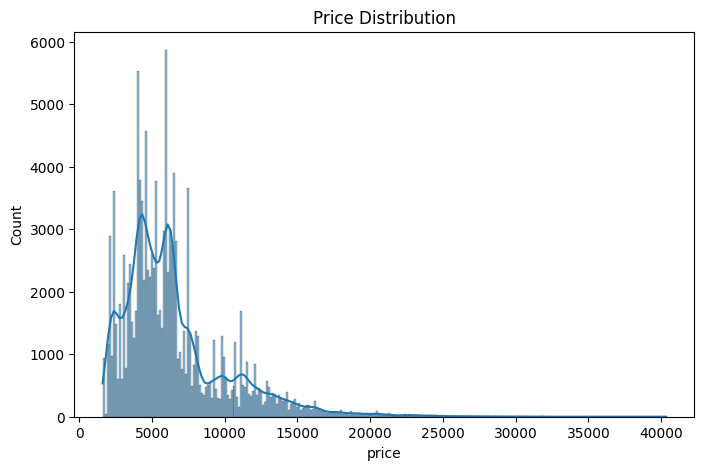

In [10]:
#Visualize
plt.figure(figsize=(8,5))
sns.histplot(data['price'] , kde=True)
plt.title("Price Distribution")
plt.show()

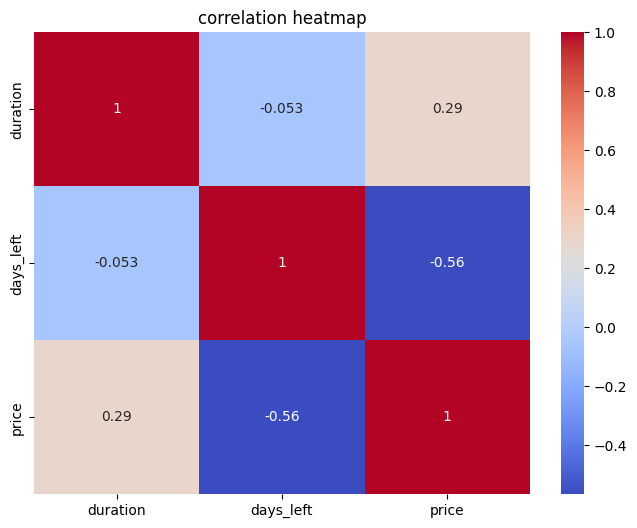

In [13]:
#Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(data[['duration' , 'days_left' , 'price']].corr(), annot=True , cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

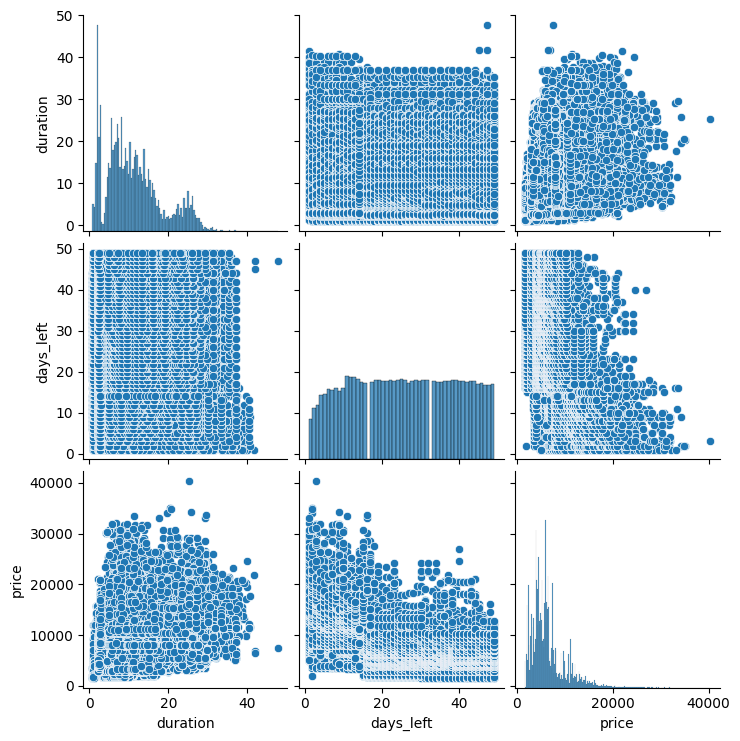

In [14]:
#pairplot of numerical features vs price
sns.pairplot(data[['duration' , 'days_left' , 'price']])
plt.show()

In [16]:
data_encoded = pd.get_dummies(data)
data_encoded.head(10)

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Delhi,source_city_Kolkata,source_city_Mumbai,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2.17,1.0,5953.0,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True
1,2.33,1.0,5953.0,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,True
2,2.17,1.0,5956.0,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,True
3,2.25,1.0,5955.0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True
4,2.33,1.0,5955.0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,True
5,2.33,1.0,5955.0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True
6,2.08,1.0,6060.0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,True
7,2.17,1.0,6060.0,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True
8,2.17,1.0,5954.0,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,True
9,2.25,1.0,5954.0,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True


In [17]:
data['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [22]:
X = data_encoded.drop('price' , axis=1)
y = data_encoded['price']

# Check for and remove rows with missing values in X and y
# This is necessary because LinearRegression cannot handle NaN values.
combined = X.copy()
combined['price'] = y
combined.dropna(inplace=True)

X = combined.drop('price', axis=1)
y = combined['price']

In [24]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 )

In [25]:
#Fit the model
LR = LinearRegression()
LR.fit(X_train , y_train)

LinearRegression()

In [26]:
Y_pred = LR.predict(X_test)

In [28]:
mse = mean_squared_error(y_test , Y_pred)
r2 = r2_score(y_test , Y_pred)
print("Mean_Squared_error:", mse)
print("R2_score:" , r2)

Mean_Squared_error: 7038560.557131548
R2_score: 0.49554148205947557
